# K-Nearest Neighbors Model Opimization

In [1]:
#Import necesarry modules
import pandas as pd
import numpy as np
import sklearn

Image for K-Nearest Neighbors

https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/279px-KnnClassification.svg.png

In [2]:
#Modify some existing columns
#Generate the "Magic Number"
data = pd.read_pickle('player_2016_2018.pkl')
data = data.dropna()
data['DK_SAL'] = pd.to_numeric(data['DK_SAL'])
data['VALUE'] = pd.to_numeric(data['VALUE'])
data['FAVORITE'] = data['FAVORITE'].astype(int)
data['SPREAD_10+'] = data['SPREAD_10+'].astype(int)
#DK Salary expressed as a percentage of the salary cap.
data['CAP_HIT'] = data['DK_SAL'] / 50000
#Represents a player VALUE that day. How many points they scored in relation to their salary
data['CAP_VALUE'] = data['DraftKings_PTS'] / data['CAP_HIT']
#This "Magic Number" gives weight to players who score MORE points AND perform above their Salary level
#Another reason I chose this number is because it comes out to be close to each players actual DK salary number
data['magic_number'] = data['DraftKings_PTS'] * data['CAP_VALUE']

In [3]:
#Select the columns that will be used for modeling / Drop unnecessary columns
X = data.drop(['DK_SAL','DATE', 'PLAYER', 'TEAM', 'OPPONENT','C_DK_PTS', 'PF_DK_PTS', 'PG_DK_PTS',
       'SF_DK_PTS', 'SG_DK_PTS', 'opp_C_allowed', 'opp_PF_allowed',
       'opp_PG_allowed', 'opp_SF_allowed', 'opp_SG_allowed','DraftKings_PTS',
        'PACE', 'OEFF', 'DEFF','MINUTES','USAGE', 'VALUE','DK_PTS_PER_MIN','CAP_HIT', 'CAP_VALUE'],axis=1)
X.columns

Index(['POSITION', 'ROAD_HOME', 'DK_POS', 'MINUTES_roll3', 'MINUTES_roll5',
       'MINUTES_roll10', 'MINUTES_roll25', 'DraftKings_PTS_roll3',
       'DraftKings_PTS_roll5', 'DraftKings_PTS_roll10',
       'DraftKings_PTS_roll25', 'USAGE_roll3', 'USAGE_roll5', 'USAGE_roll10',
       'USAGE_roll25', 'REST DAYS', 'OPENING TOTAL', 'FAVORITE', 'SPREAD_10+',
       'PACE_roll3', 'PACE_roll5', 'PACE_roll10', 'PACE_roll25', 'OEFF_roll3',
       'OEFF_roll5', 'OEFF_roll10', 'OEFF_roll25', 'DEFF_roll3', 'DEFF_roll5',
       'DEFF_roll10', 'DEFF_roll25', 'opp_C_allowed_roll3',
       'opp_C_allowed_roll5', 'opp_C_allowed_roll10', 'opp_C_allowed_roll25',
       'opp_PF_allowed_roll3', 'opp_PF_allowed_roll5', 'opp_PF_allowed_roll10',
       'opp_PF_allowed_roll25', 'opp_PG_allowed_roll3', 'opp_PG_allowed_roll5',
       'opp_PG_allowed_roll10', 'opp_PG_allowed_roll25',
       'opp_SF_allowed_roll3', 'opp_SF_allowed_roll5', 'opp_SF_allowed_roll10',
       'opp_SF_allowed_roll25', 'opp_SG_allowed_rol

In [4]:
#Convert categorical variables to dummies
X = pd.get_dummies(X)

In [5]:
#Import necessary sklearn tools
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

/Users/willhall/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/willhall/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [6]:
#Split data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2,shuffle=False)



In [7]:
#Remove the variable we desire to predict
y_train = X_train.pop('magic_number')
y_test = X_test.pop('magic_number')


In [8]:
X_train_scaled = pd.DataFrame(scale(X_train))
X_test_scaled = pd.DataFrame(scale(X_test))

In [9]:
y = X.pop('magic_number')

In [10]:
X_scaled = pd.DataFrame(scale(X))

# Not Scaled X

In [24]:
k_range = [145,147,150,153,155]
k_scores = []
scoring = ['neg_mean_absolute_error']
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn,X_train,y_train,cv=5,scoring = 'neg_mean_absolute_error', n_jobs=-1)
    k_scores.append(scores.mean())
print(k_scores)

[-3439.6745041390386, -3439.8447267102915, -3439.542992993408, -3439.7049250152959, -3439.9281078028675]


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Cross-Validated Accuracy')

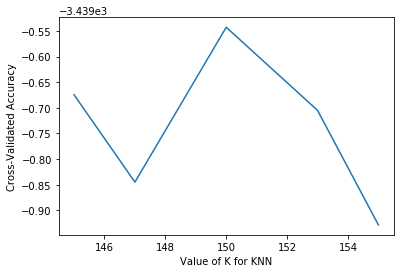

In [26]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Scaled X

In [27]:
k_range = [100,110,117,125,135]
k_scores = []
scoring = ['neg_mean_absolute_error']
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn,X_train_scaled,y_train,cv=5,scoring = 'neg_mean_absolute_error', n_jobs=-1)
    k_scores.append(scores.mean())
print(k_scores)

[-3475.4812956560004, -3476.7352273135061, -3476.8748883265034, -3477.1837558532252, -3476.6348491996769]


Text(0,0.5,'Cross-Validated Accuracy')

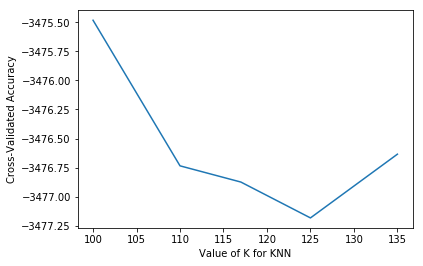

In [28]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Ude GridSearch CV to find the optimal parameters for the model

In [29]:
k_range = [148,149,150,151,152]
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)


{'n_neighbors': [148, 149, 150, 151, 152], 'weights': ['uniform', 'distance']}


In [30]:
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=5, scoring = 'neg_mean_absolute_error',n_jobs=-1)

In [31]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [148, 149, 150, 151, 152], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [32]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=150, p=2,
          weights='distance')

# Fit the test data to the best estimator

In [33]:
y_oob_knn = grid.best_estimator_.predict(X_test)

In [37]:
data_splt_train, data_split_test = train_test_split(data, test_size=0.2,shuffle=False)



In [38]:
result = data_split_test[['DATE','PLAYER','TEAM','DK_POS','DK_SAL','DraftKings_PTS','magic_number']]

In [39]:
print(y_oob_knn.shape)
print(result.shape)

(10038,)
(10038, 7)


In [40]:
result = result.assign(magic_number_PRED = y_oob_knn)

In [41]:
result.to_pickle('Final_presentation_KNN_150.pkl')

In [ ]:
result.to_pickle('Prediction_master_number_attempt_knn_154.pkl')